# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [55]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [56]:
#mounting the google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# reading the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [58]:
# Write your code here
# his code returns the number of rows and columns in the DataFrame
print("There are", df.shape[0], "rows and", df.shape[1], "columns present in the dataset")

There are 1898 rows and 9 columns present in the dataset


#### Observations:
The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [59]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   order_id, customer_id, food_preparation_time and deliver_time are integer data type
  *   Out of these four, order_id and cusomer_id are ordinal values whereas since food_preparation_time and deliver_time are numeric values

*   cost_of_the_order is float data type

*   restaurant_name, cuisine_type, day_of_the_week and rating are object data type
  *   rating is an object data type because it is a mix of integer and string values as can be observed in the result of ```head()``` function

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [60]:
# Write your code here
#checking if any column has null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
All the columns have 0 null values, which means we have no missing data. Hence we do not need to treat it at this point

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [61]:
'''Even though customer_id and order_id are of int data type,
    it does not make sense in getting statistical data for them
    since they are ordinal and not numeric.
    Hence, to study the statistical data of only numeric values,
    creating a copy of data set without the ordinal data and
    performing the describe() function on it'''
df1_cols = set(df.columns) - {'order_id', 'customer_id'}
df1 = df[list(df1_cols)]
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00


Observations:
*   Mean delivery time is 24.16 mins with a minimum of 15 mins and a maximum of 33 mins to deliver the food to the customer
*   Mean cost of order is \$16 while the minimum cost is \$4.47 and maximum is $35.41
*   Mean food preparation time is 27 mins with a minimum of 20 mins and a maximum of 35 mins needed to prepare the food


In [62]:
#determining the statistical data for categorical variables
df.describe(include = [object])

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


Observations:
*   There are 178 unique restaurants from which customers have ordered food, 'Shake Shack' being the most often ordered restaurant with 219 orders
*   There are 14 different cuisine types that are ordered using the app, American cuisine being the most prefered on the app, ordered 584 times
*   There are only 2 unique values for Day of the week. Of the two, customers have used the app more frequently on weekends with 1351 orders
*   There are 4 unique rating values, but the most frequent one is 'Not Given' which means customer has not rated 736 times





In [63]:
#Since customer_id and order_id are ordinal values,
#determing mean and other statistical data doesn't make sense
#Hence converting these into object type and then determining
#categorical summary for them
df2 = df[list(['customer_id','order_id'])].copy() #creating a copy of only customer id and order id columns
df2['customer_id'] = df2['customer_id'].astype(object) #changing customer_id data type to object from int64
df2['order_id'] = df2['order_id'].astype(object) #changing order_id data type to object from int64
df2.describe()

,customer_id,order_id
count,1898,1898
unique,1200,1898
top,52832,1477147
freq,13,1


#### Observations:
*   There are 1200 unique customer IDs in our dataset which mean 1200 different customers have ordered using the app. Customer with ID 52832 has ordered most often, 13 times
*   There are total 1898 orders in our dataset



### **Question 5:** How many orders are not rated? [1 mark]

In [64]:
# Write the code here
df.loc[(df['rating'] == 'Not given'),'rating'].value_counts()

Not given    736
Name: rating, dtype: int64

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####***Observations on Order ID***

Order ID is of ordinal type

In [65]:
df['order_id'].nunique()

1898

**Observations:**
*   There are 1898 unique order_id, which is equal to the number of rows in our
dataset. So, order_id is unique to each entry.

####***Observations on Customer ID***

Even though Customer ID is ordinal, a histogram might give us an insight about pattern of the Customer IDs placing orders more often

In [66]:
# Write the code here
# checking for number of unique customer ids
df['customer_id'].nunique()

1200

There are 1200 unique customer IDs in a dataset of 1898 entries. This means some customer IDs have repeat orders.

The histogram below shows the number of orders for different ranges of customer IDs

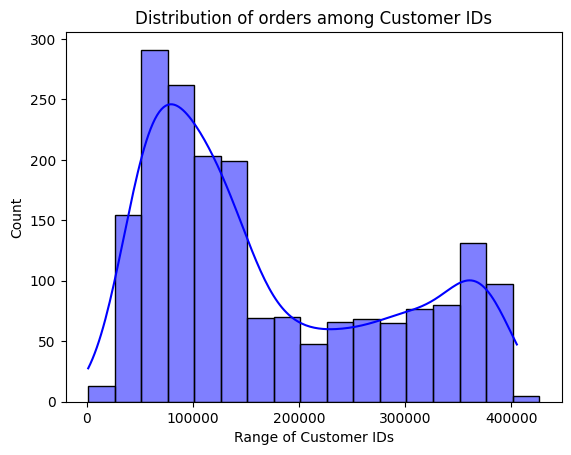

In [67]:
# histogram showing the distribution of customer_id
# Even though customer_id is ordinal, it may give some insight between what customer_id numbers most orders have been placed
sns.histplot(x = df['customer_id'], binwidth = 25000, kde = True, color = 'blue')
plt.title('Distribution of orders among Customer IDs')
plt.xlabel('Range of Customer IDs')
plt.show()

In [68]:
#determing the smallest and the largest customer ID
print("Min:",df['customer_id'].min(), "and Max:", df['customer_id'].max())

Min: 1311 and Max: 405334


Observations:
*   A bimodal distribution is observed
*   Range of customer IDs is from 1311 to 405334
*   Most of the customer IDs who have ordered food lie between about 25000 and 150000.
*   Customers whose IDs are greater than 150000 have fewer orders placed

####***Observations on Restaurant Name***
Restaurant names are categorical but we will be able to observe which restaurants have received orders repeatedly

In [69]:
# determining number of unique restaurants
df['restaurant_name'].nunique()

178

There are 178 unique restaurant names in 1898 entries. This implies that a few restaurants have repeat orders

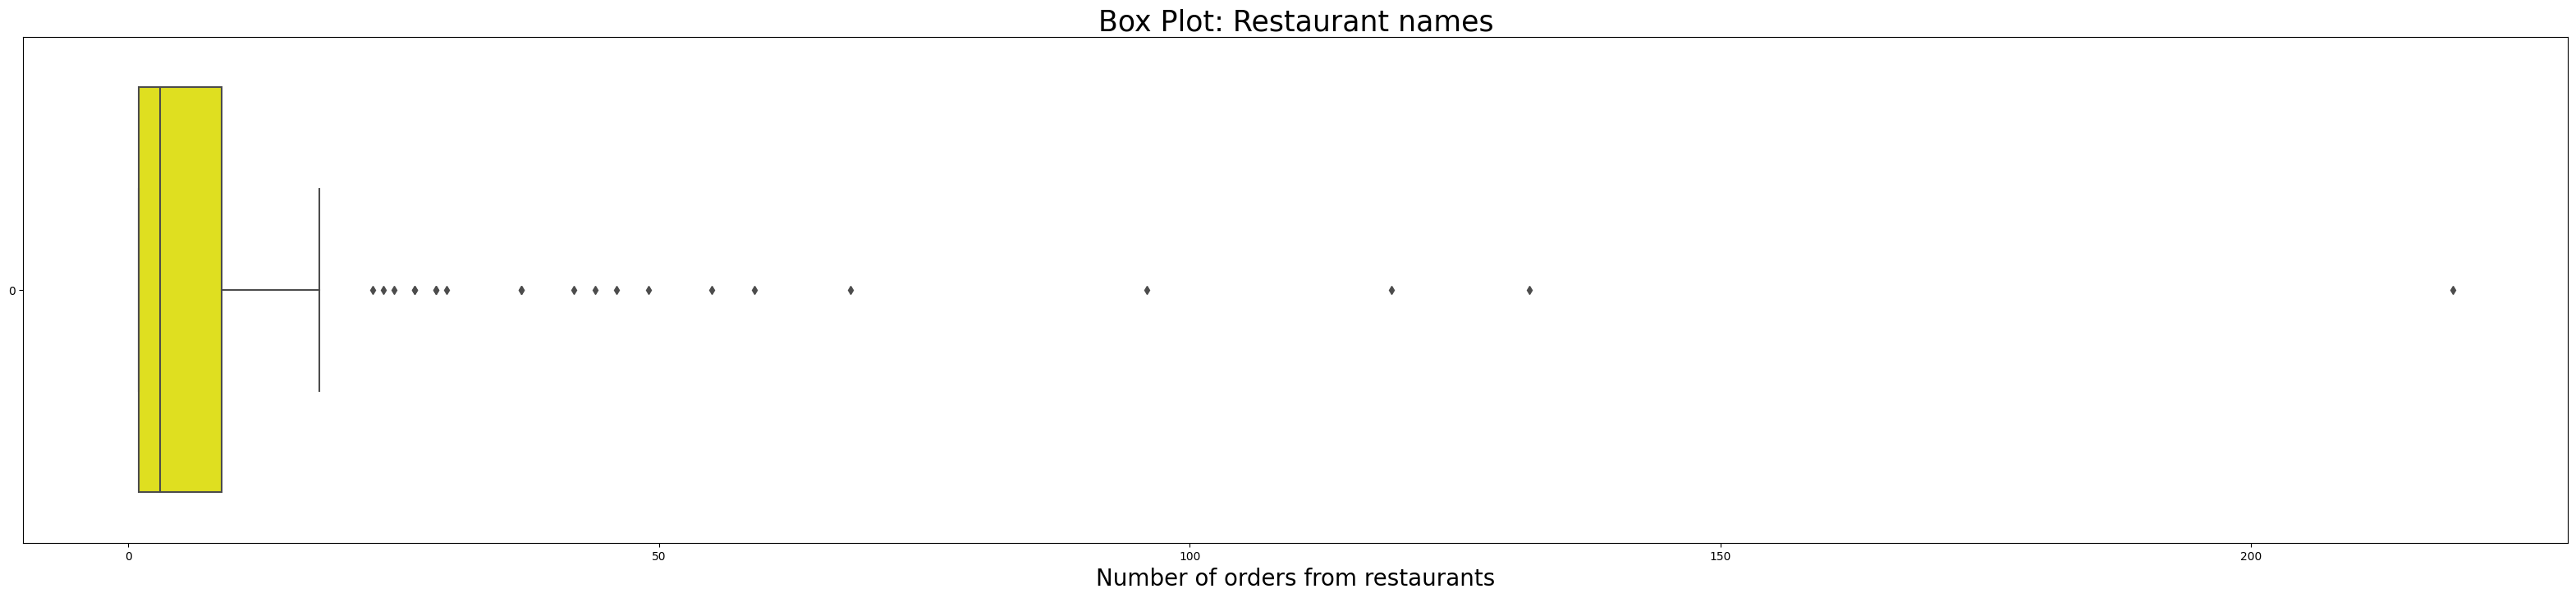

In [70]:
#boxplot showing the distribution of orders among different restaurants
plt.figure(figsize = (40,8))
sns.boxplot(df['restaurant_name'].value_counts(), orient = 'h', color = 'yellow')
plt.title('Box Plot: Restaurant names', fontsize = 25)
plt.xlabel('Number of orders from restaurants', fontsize = 20)
plt.show()

In [71]:
#Obtaining the descriptive statistics of the box plot
IQR = np.percentile(df['restaurant_name'].value_counts(), 75) - np.percentile(df['restaurant_name'].value_counts(), 25)
median = np.percentile(df['restaurant_name'].value_counts(), 50)
print("Median:", median,
      "\n1st Quartile: ", np.percentile(df['restaurant_name'].value_counts(), 25),
      "\n3rd Quartile: ", np.percentile(df['restaurant_name'].value_counts(), 75),
      "\nLeft Whisker:", np.percentile(df['restaurant_name'].value_counts(), 0),
      "\nRight Whisker:", (median + 1.5*IQR))

Median: 3.0 
1st Quartile:  1.0 
3rd Quartile:  8.75 
Left Whisker: 1.0 
Right Whisker: 14.625


In [72]:
# checking for restaurant with the maximum number of orders
df['restaurant_name'].value_counts().head(1)

Shake Shack    219
Name: restaurant_name, dtype: int64

Observations:
*   There are 178 restaurants from which customers have ordered using this app
*   More than 50% of the restaurants have less than 3 orders placed by customers using this app
*   There are many outliers observed in the box plot which means a few restaurants have orders more than the right whisker which is more than 14 orders placed using the app
*   This highest number of orders have been placed for the restaurant 'Shake Shack' which is 219






####***Observations on Cuisine Type***
Cuisine Type is categorical

In [73]:
# determining number of unique cusisine type
df['cuisine_type'].nunique()

14

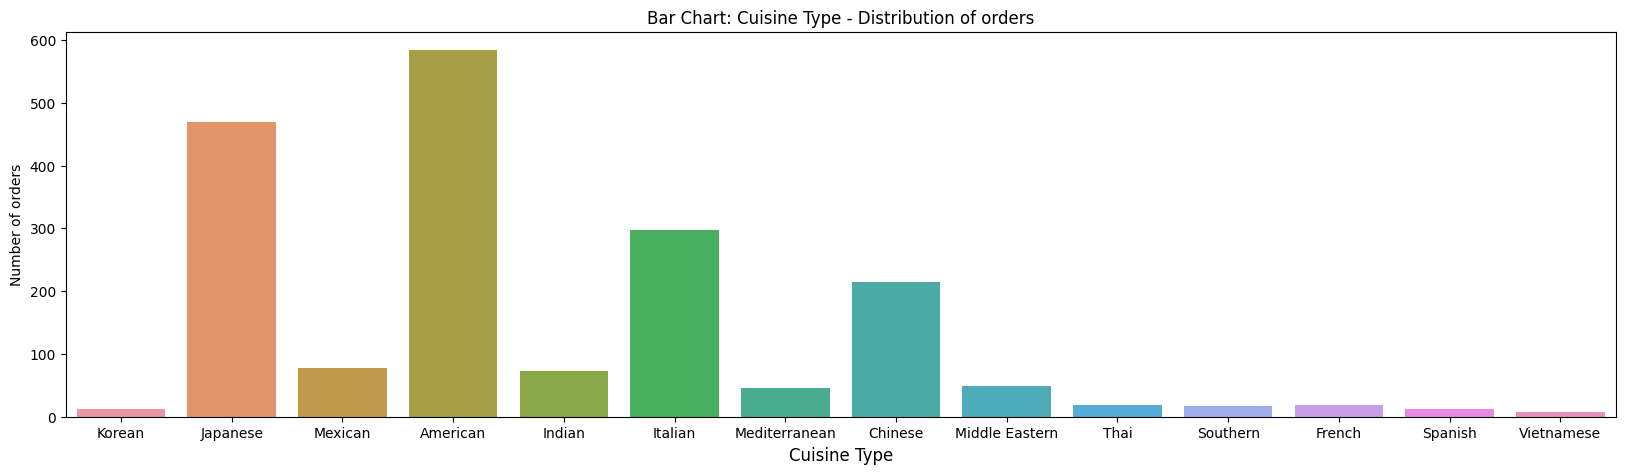

In [74]:
# bar plot to show the distribution of cuisine_type
plt.figure(figsize= (20,5))
sns.countplot(x = df['cuisine_type'])
plt.title('Bar Chart: Cuisine Type - Distribution of orders')
plt.xlabel('Cuisine Type', fontsize = 12)
plt.ylabel('Number of orders')
plt.show()

In [75]:
# determining cuisine type that is most often ordered
df['cuisine_type'].value_counts().head(1)

American    584
Name: cuisine_type, dtype: int64

In [76]:
# determining cuisine type that is ordered the least
df['cuisine_type'].value_counts().tail(1)

Vietnamese    7
Name: cuisine_type, dtype: int64

**Observation:**
*   There are 14 unique cuisine types ordered using the app
*   American is the most ordered cuisine type and has been ordered 584 times
*   Vietnamese is the least commonly ordered cuisine and has been ordered only 7 times using the app

####***Observations on cost of the order***

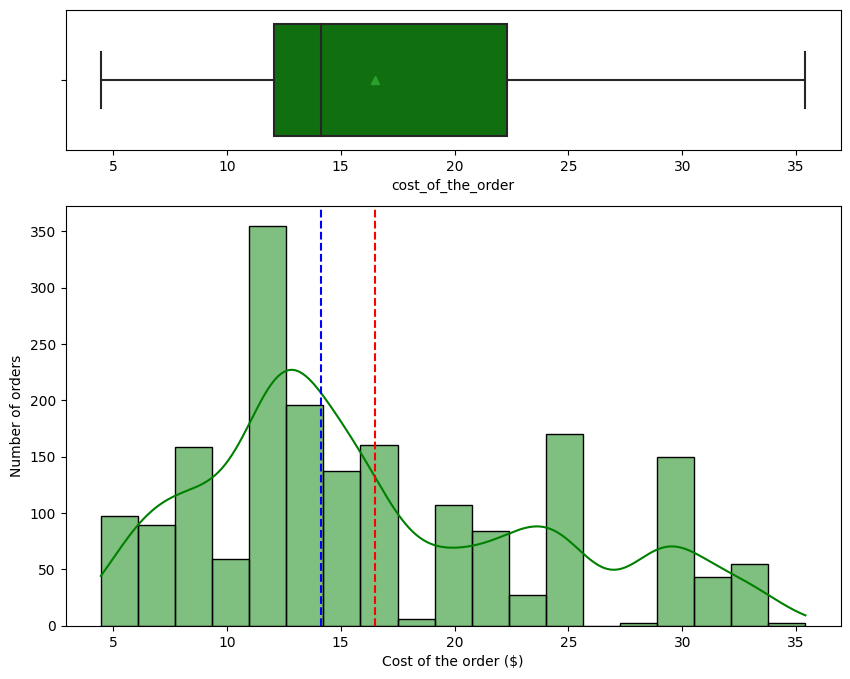

In [77]:
# boxplot and histogram showing the distribution of cost of the order
# declaring subplots with same x axis
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize = (10,8))

# plotting the boxplot in the 1st subplot
sns.boxplot(data = df,  x='cost_of_the_order', showmeans = True, ax = ax1, color = 'green')

# plotting the histogram to see the distribution
sns.histplot(data = df, x ='cost_of_the_order', ax = ax2, kde = True, color = 'green')
plt.xlabel('Cost of the order ($)')
plt.ylabel('Number of orders')
ax2.axvline(np.mean(df['cost_of_the_order']), color='r', linestyle='--') #red line showing mean
ax2.axvline(np.median(df['cost_of_the_order']), color='b', linestyle='--') #blue line showing median

plt.show()

In [78]:
# Obtaining the descriptive statistics of the box plot
print("Mean:", df['cost_of_the_order'].mean(),
      "\nMedian:", df['cost_of_the_order'].median(),
      "\n1st Quartile: ", np.percentile(df['cost_of_the_order'], 25),
      "\n3rd Quartile: ", np.percentile(df['cost_of_the_order'], 75),
      "\nLeft Whisker:", df['cost_of_the_order'].min(),
      "\nRight Whisker:", df['cost_of_the_order'].max())

Mean: 16.498851422550054 
Median: 14.14 
1st Quartile:  12.08 
3rd Quartile:  22.2975 
Left Whisker: 4.47 
Right Whisker: 35.41


**Observations:**
*   It can be observed from the histogram that the distribution of cost of the order is multimodal
*   The mean cost of the orders is \$16.50
*   The median cost of the order is \$14.14
*   Almost 25% of the orders cost less than \$12.08
*   75% of orders cost less than \$22.30
*   The highest cost of any order placed is  \$35.41

####***Observations on Day of the Week***

In [79]:
# checking for number of unique values
df['day_of_the_week'].nunique()

2

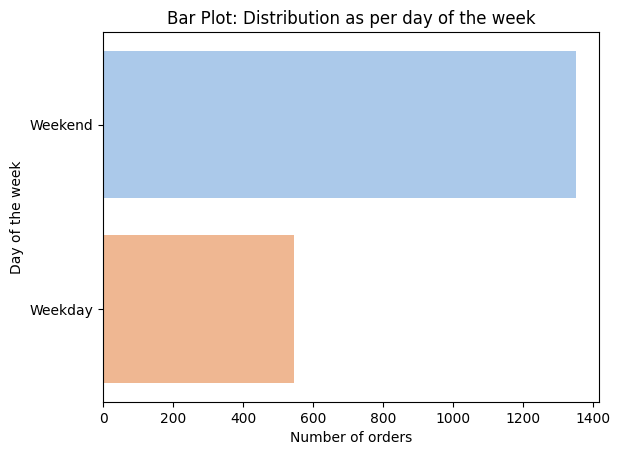

In [80]:
#day of the week
sns.countplot(y = df['day_of_the_week'], palette = 'pastel')
plt.title('Bar Plot: Distribution as per day of the week')
plt.xlabel('Number of orders')
plt.ylabel('Day of the week')
plt.show()

In [81]:
#count of each type of day of the week
print(df['day_of_the_week'].value_counts())

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


**Observations:**
*   There are only two distinct values for days of the week - Weekday and Weekend
*   We can observe from the bar graph that the app is used more to order on weekend as compared to weekday (1351 on weekend vs 547 on weekday)

####***Observations on Rating***

In [82]:
#checking for unique values of rating
df['rating'].nunique()

4

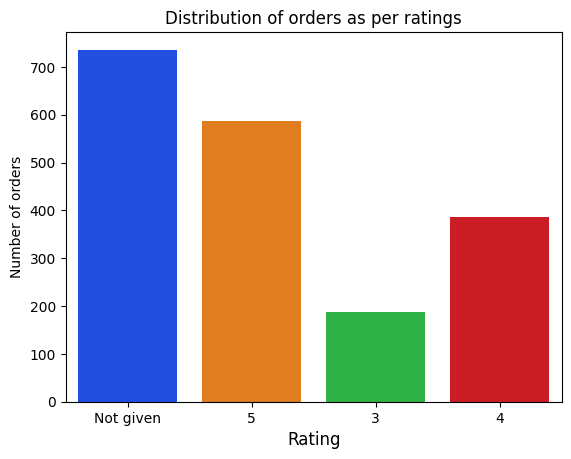

In [83]:
#countplot for rating
sns.countplot(x = df['rating'], palette = 'bright')
plt.title("Distribution of orders as per ratings")
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Number of orders')
plt.show()

In [84]:
#count of each rating
print(df['rating'].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


**Observation:**


*   A large number of customers have not rated their experience - 736 of them
*   Among the customers who have rated their experience, 5 is the highest rating they have given their experience and 3 is the lowest
*   588 of the cusomers have rated it 5
*   Only 188 of the customers who have rated their experience have rated it a 3

####***Observations on Food Preparation Time***

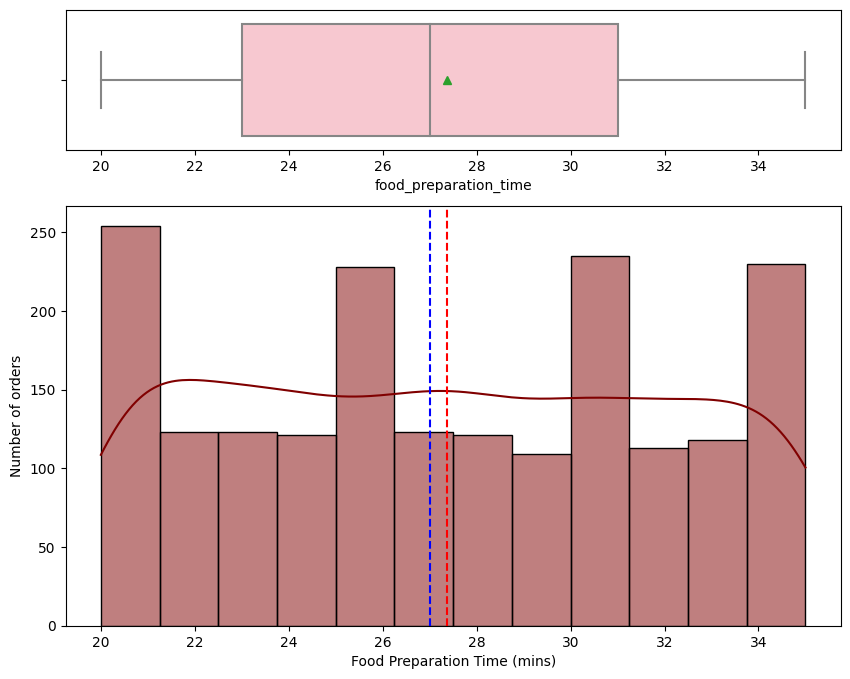

In [85]:
# Boxplot and histogram to observe distribution of data among food_preparation_time
# declaring subplots with same x axis
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize = (10,8))

# plotting the boxplot in the 1st subplot
sns.boxplot(data = df,  x='food_preparation_time', showmeans = True, ax = ax1, color = 'pink')

# plotting the histogram to see the distribution
sns.histplot(data = df, x ='food_preparation_time', ax = ax2, kde = True, color = 'maroon')
plt.xlabel('Food Preparation Time (mins)')
plt.ylabel('Number of orders')
ax2.axvline(np.mean(df['food_preparation_time']), color='r', linestyle='--') #red line showing mean
ax2.axvline(np.median(df['food_preparation_time']), color='b', linestyle='--') #blue line showing median

plt.show()

In [86]:
# Obtaining the descriptive statistics of the box plot
print("Mean:", df['food_preparation_time'].mean(),
      "\nMedian:", df['food_preparation_time'].median(),
      "\n1st Quartile: ", np.percentile(df['food_preparation_time'], 25),
      "\n3rd Quartile: ", np.percentile(df['food_preparation_time'], 75),
      "\nLeft Whisker:", df['food_preparation_time'].min(),
      "\nRight Whisker:", df['food_preparation_time'].max())

Mean: 27.371970495258168 
Median: 27.0 
1st Quartile:  23.0 
3rd Quartile:  31.0 
Left Whisker: 20 
Right Whisker: 35


**Observation:**
*   Food Preparation time has a uniform distribution
*   Mean time for food preparation is 27.37 mins and median is 27 mins showing that data is almost uniformly distributed
*   It takes a minimum of 20 mins to prepare food for any order placed through the app and a maximum of 35 mins




####**Observations on Delivery Time**

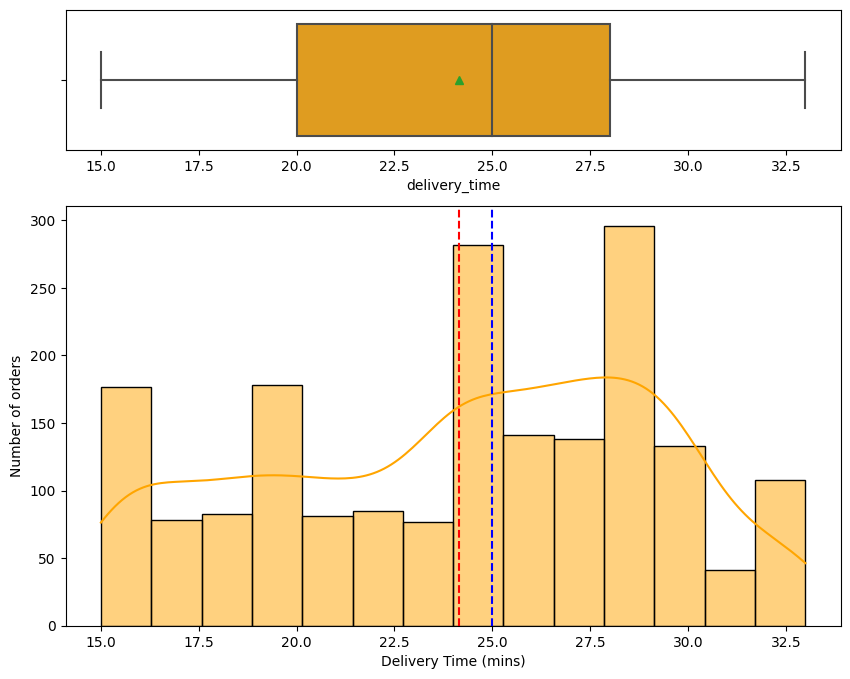

In [87]:
# Boxplot and histogram to observe distribution of data among delivery time
# declaring subplots with same x axis
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize = (10,8))

# plotting the boxplot in the 1st subplot
sns.boxplot(data = df,  x='delivery_time', showmeans = True, ax = ax1, color = 'orange')

# plotting the histogram to see the distribution
sns.histplot(data = df, x ='delivery_time', ax = ax2, kde = True, color = 'orange')
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Number of orders')
ax2.axvline(np.mean(df['delivery_time']), color='r', linestyle='--') #red line showing mean
ax2.axvline(np.median(df['delivery_time']), color='b', linestyle='--') #blue line showing median

plt.show()

In [88]:
# Obtaining the descriptive statistics of the box plot
print("Mean:", df['delivery_time'].mean(),
      "\nMedian:", df['delivery_time'].median(),
      "\n1st Quartile: ", np.percentile(df['delivery_time'], 25),
      "\n3rd Quartile: ", np.percentile(df['delivery_time'], 75),
      "\nLeft Whisker:", df['delivery_time'].min(),
      "\nRight Whisker:", df['delivery_time'].max())

Mean: 24.161749209694417 
Median: 25.0 
1st Quartile:  20.0 
3rd Quartile:  28.0 
Left Whisker: 15 
Right Whisker: 33


**Observation:**
*   The histogram shows a unimodal distribution with the mean at 24.16 mins and median at 25 mins.
*   It takes atleast 15 mins and maximum of 33 mins to deliver an order

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [89]:
# Write the code here
#the code below displays the top 5 restaurants in terms of number of orders received
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of number of orders received are:
*   Shake Shack with 219 orders
*   The Meatball Shop with 132 orders
*   Blue Ribbon Sushi with 119 orders
*   Blue Ribbon Fried Chicken with 96 orders
*   Parm with 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [90]:
# Write the code here
# The following code retrieves the most popular cuisine on weekends
df.loc[(df['day_of_the_week'] == 'Weekend'),['cuisine_type']].value_counts().head(1)

cuisine_type
American        415
dtype: int64

#### Observations:
It is observed that the most common cuisine type ordered on weekends is American which is ordered 415 times in the dataset

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [91]:
# Write the code here
# The code below informs about the percentage of orders that cost more than 20 dollars
print("Number of orders that cost more than $20: ", df[(df['cost_of_the_order'] > 20)]['cost_of_the_order'].count())
print("Percentage: ", np.round((df[(df['cost_of_the_order'] > 20)]['cost_of_the_order'].count()) / df.shape[0] * 100, 2), "%", sep = "")

Number of orders that cost more than $20:  555
Percentage: 29.24%


#### Observations:
555 orders cost more than \$20 which is 29% of the order

### **Question 10**: What is the mean order delivery time? [1 mark]

In [92]:
# Write the code here
#The code below gives information about the mean delivery time
print("Mean order delivery time:", np.round(df['delivery_time'].mean(), 2), "mins")

Mean order delivery time: 24.16 mins


#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [93]:
#Determining number of unique customer IDs
df['customer_id'].nunique()

1200

In [94]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
*   The most frequent customer ID is 52832 who has placed order 13 times
*   The second most frequent customer ID is 47440 who has placed order 10 times
*   Third most frequent customer ID is 83827 who has placed order 9 times
These three customers are the ones who should get the 20% discount voucher

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### **Correlation among numeric variables**

There are three numeric variables: cost_of_the_order, food_preparation_time and delivery_time

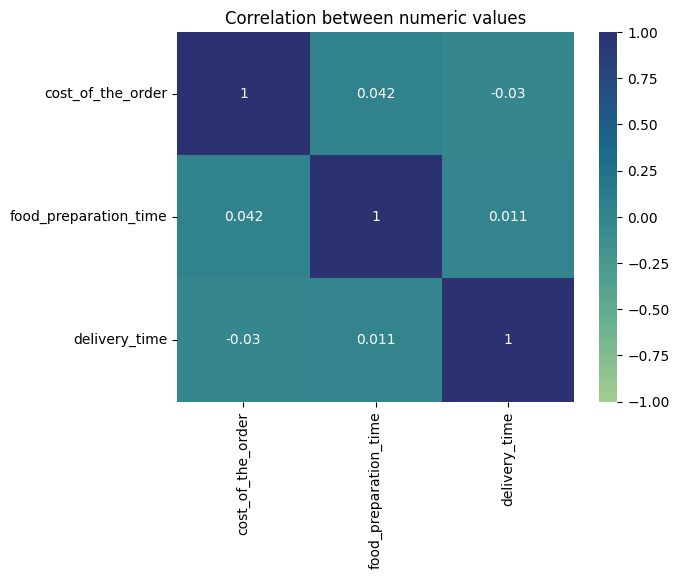

In [95]:
# Write the code here
# Heat map to observe any existing correlation between the numeric variables
sns.heatmap(data = df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot = True, cmap = 'crest', vmin = -1, vmax = 1)
plt.title('Correlation between numeric values')
plt.show()

Observations:
*   There is a very low positive correlation between cost of order and food preparation time
*   There is a very low negative correlation between cost of order and delivery time
*   There is a very low positive correlation between food preparation time and delivery time

It can be concluded that there is no correlation between any of these variables

####**Relation between Cuisine and cost of order**

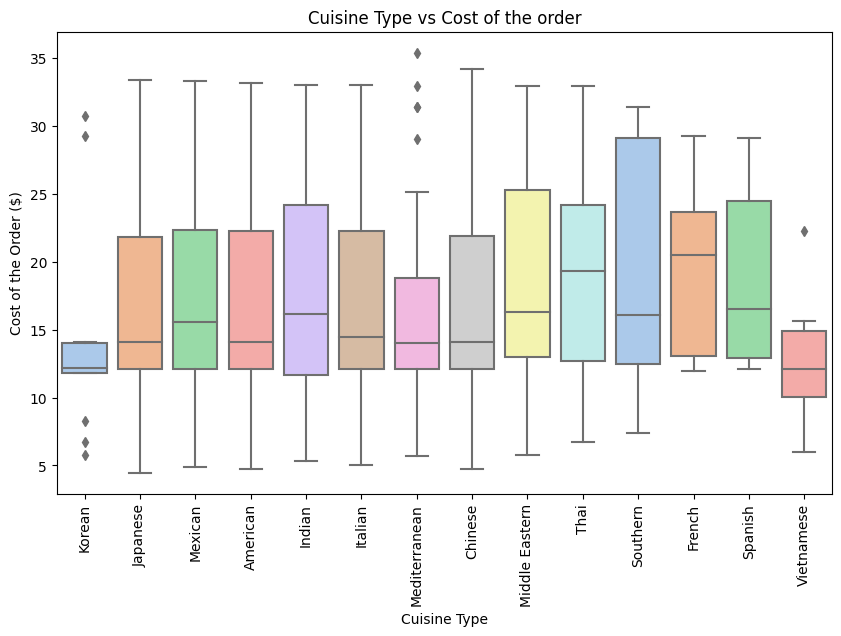

In [96]:
#boxplot to explore the relation between cuisine type and cost of order
plt.figure(figsize = (10,6))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'pastel')
plt.title('Cuisine Type vs Cost of the order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order ($)')
plt.xticks(rotation = 90)
plt.show()

Observations:
*   Southern cuisine seems to have the widest range of cost while Korean has the smallest range
*   Median cost of French food is the highest whereas that of Korean and Vietnamese is the lowest
*   Meditarranean and Korean food seem to have many outliers with respect to cost compared to other cuisines

####**Relation between Cuisine and food preparation time**

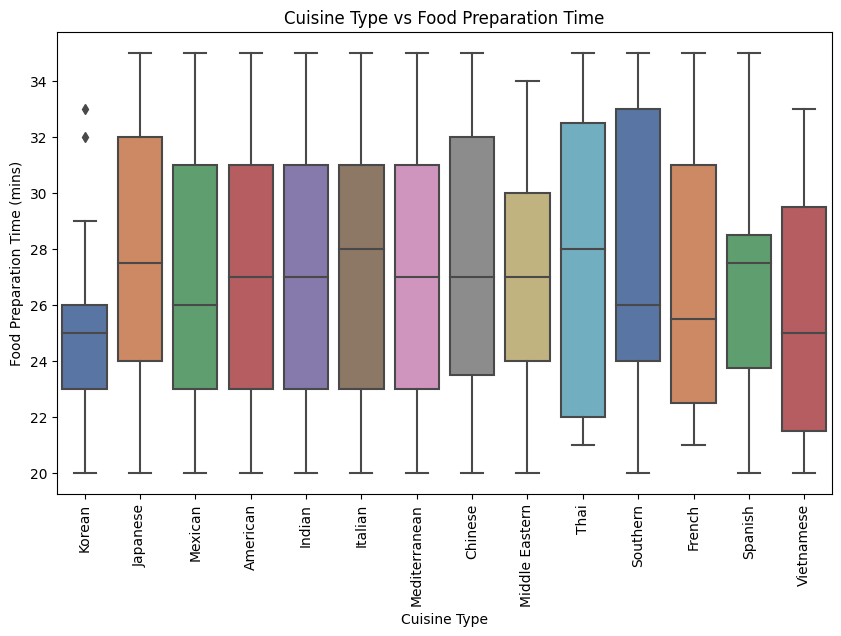

In [97]:
#boxplot to explore the relation between cuisine type and food preparation type
plt.figure(figsize = (10,6))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'deep')
plt.title('Cuisine Type vs Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (mins)')
plt.xticks(rotation = 90)
plt.show()

Observations:


*   Most cuisine types seem to take between 20 mins to 34 mins to prepare food except Korean and Vietnamese
*   Korean and Vietnamese seem to have a smaller range of values for food preparation time which means they get prepared faster



####**Relation between Day of the Week and delivery time**

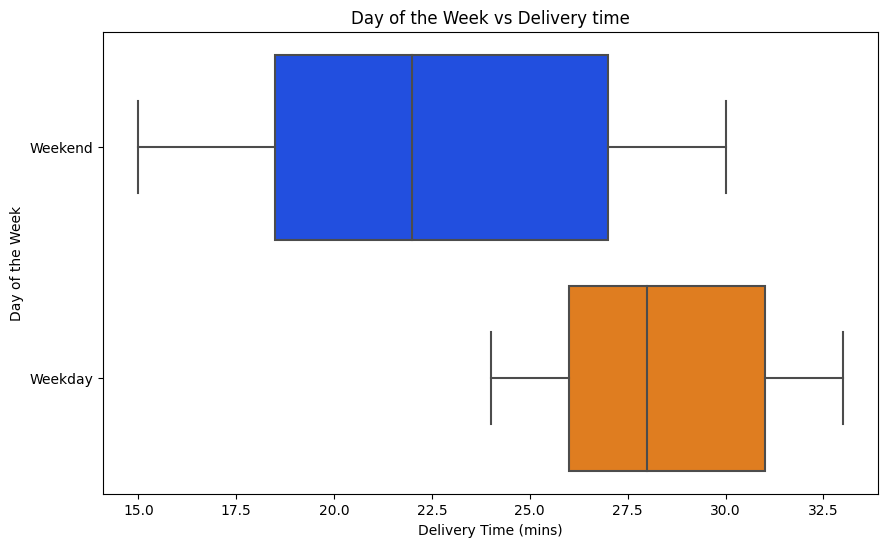

In [98]:
#boxplot to explore the relation between week of the day and delivery time
plt.figure(figsize = (10,6))
sns.boxplot(x = "delivery_time", y = "day_of_the_week", data = df, palette = 'bright')
plt.title('Day of the Week vs Delivery time')
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Day of the Week')
plt.show()

Observation: It takes longer to deliver food on a weekday compared to a weekend

####**Relation between Rating and cost of order**

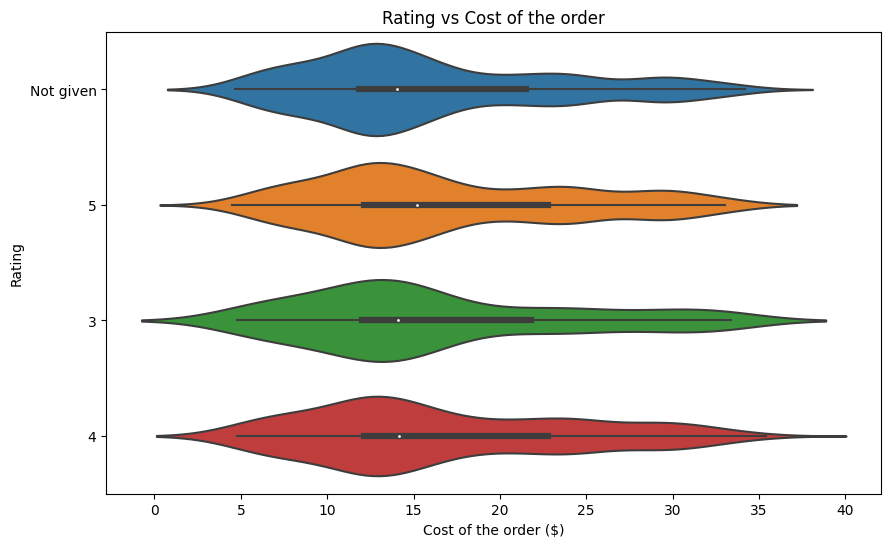

In [99]:
#drawing the violin plot to explore the relation between rating and cost of the order
plt.figure(figsize = (10,6))
sns.violinplot(data = df, x = 'cost_of_the_order', y = 'rating')
plt.title('Rating vs Cost of the order')
plt.xlabel('Cost of the order ($)')
plt.ylabel('Rating')
plt.show()

Observations:

  

*  There is a wider spread of rating data for food costing between \$10 and \$15. This also indicates most orders are between that price range as can be seen in the univariate analysis of cost of the order as well.
*   The median value of rating 5 is slightly more than that of other ratings, which might indicate customers are more satisfied with the service when the cost of te order is slightly higher.

####**Relation between Rating and food preparation time**

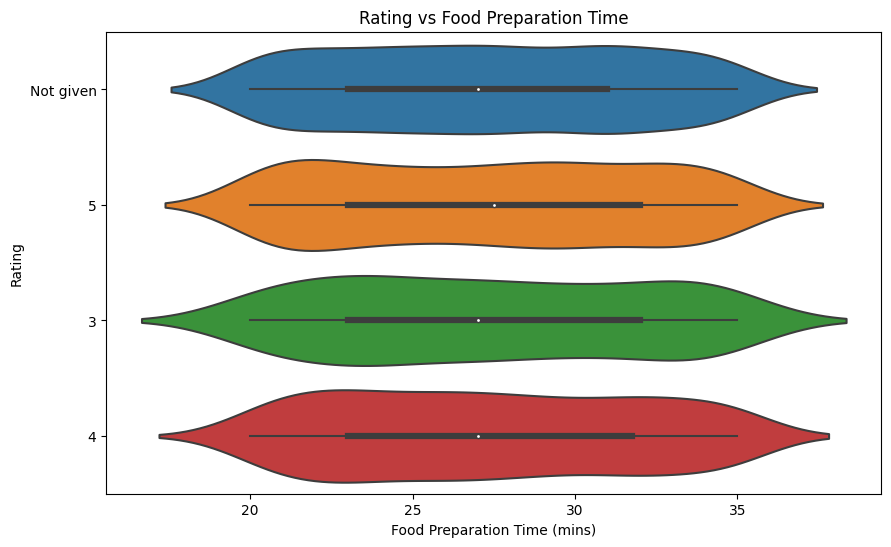

In [100]:
#drawing the violin plot to explore the relation between rating and food preparation time
plt.figure(figsize = (10,6))
sns.violinplot(data = df, x = 'food_preparation_time', y = 'rating')
plt.title('Rating vs Food Preparation Time')
plt.xlabel('Food Preparation Time (mins)')
plt.ylabel('Rating')
plt.show()

Observations: The spread of data points across the food preparation time for each rating seems quite uniform. This means almost customers have rated/not rated for all food preparation time and there doesn't seem to be any particular relation between them.

####**Relation between Rating and food delivery time**

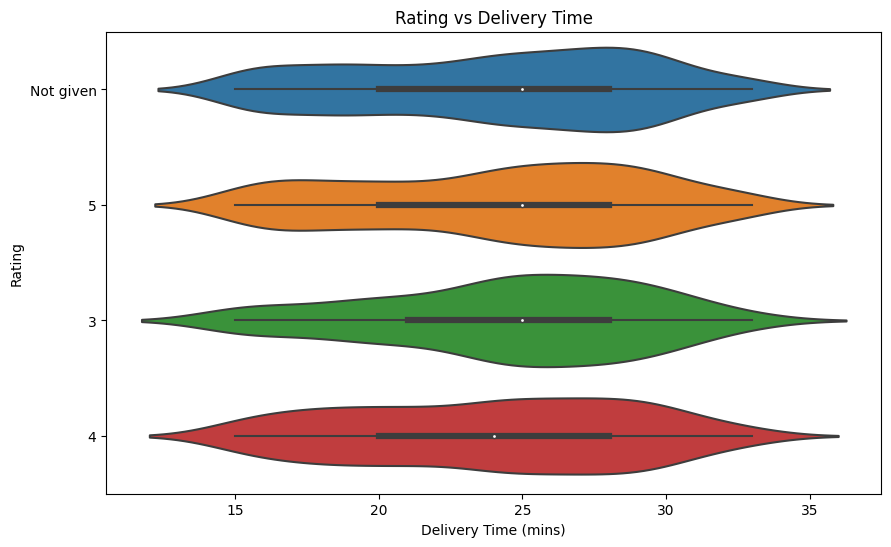

In [101]:
#drawing the violin plot to explore the relation between rating and food delivery time
plt.figure(figsize = (10,6))
sns.violinplot(data = df, x = 'delivery_time', y = 'rating')
plt.title('Rating vs Delivery Time')
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Rating')
plt.show()

Observations: The violin plot is wider between 22 to about 32 mins. This shows that there are more ratings given/not given between this particular delivery time range.

####**Relation between Rating and Cuisine Type**

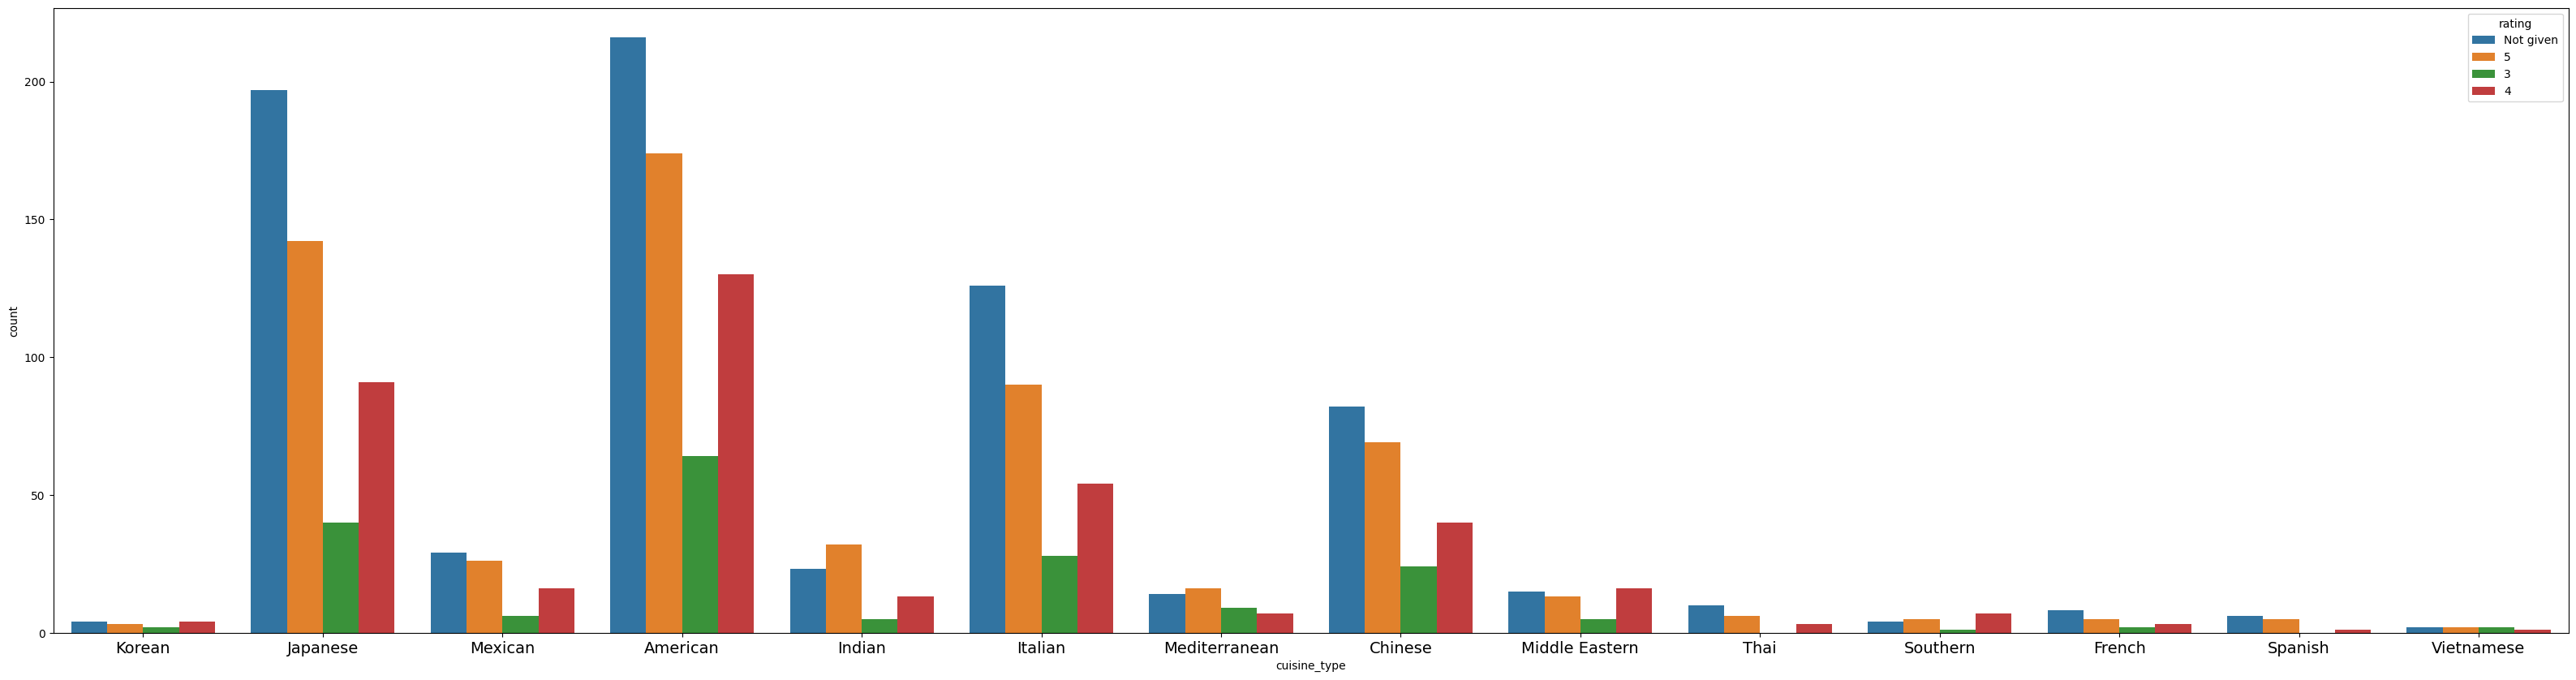

In [102]:
plt.figure(figsize = (40,10))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating')
plt.xticks(fontsize = 14)
plt.show()

Observations:
*   American and Japanese cuisine types have most orders that having ratings
*   Among those that are rated, most cuisine types have a majorty customers rating them at a 4 and 3



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

To calculate the sum or average of ratings, we need to first consider the data with rating 'Not Given', since these calculations can be done only on numeric data type. So, we need to treat the data.There are two ways to treat this:
1.   Replace 'Not given' with a 0: This method will not impact the total count of rating, however, the average rating calculations will be affected since the number of values included (deominator) will be higher.
2.   Ignore the 'Not given' rating data and consider only the ones that have been rated.

We will use the second approach.


In [103]:
#seperating rows of data have have a numeric value for rating to a new dataframe
df_rated = df.copy()[df['rating'] != 'Not given']
df_rated.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


Now, that we have seperated out the data, we need to change the object type to int in order to calculate the count and mean

In [104]:
#changing the rating column data from object dtype to int dtype
df_rated['rating'] = df_rated['rating'].astype(int)
df_rated['rating'].dtype

dtype('int64')

Now, that the dtype has been changed to int. we find the restaurants that satisfy the conditions.

In [105]:
# Write the code here
#creating a new dataframe that holds data about restaurants with their total rating and average rating
df_restaurant_ratings = df_rated.groupby('restaurant_name')['rating'].agg(['count','mean'])

#checking which restaurants fulfil the given conditions
df_offer = df_restaurant_ratings.loc[(df_restaurant_ratings['count']>50) & (df_restaurant_ratings['mean']>4)]
df_offer

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
4 restaurants have a count of rating more than 50 and mean of more than 4. These 4 restaurants fulfil the criteria to avail the promotional offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [106]:
# Write the code here

#creating a new column to determine company charges
df['company_charges'] = 0

# if the cost of order is greater than $5 then charges is 15%
# locating entries with cost greater than 5 and determining the company charges
df.loc[(df['cost_of_the_order']>5), 'company_charges'] = (df['cost_of_the_order'] * 0.15)

#if the cost of order is greater than $20 then charges is 25%
#These orders have already been processed a charge of 15% in the previous step, now replacing it with 25% charge
# locating entries with cost greater than 20 and determining the company charges
df.loc[(df['cost_of_the_order']>20), 'company_charges'] = (df['cost_of_the_order']*0.25)
print("Net Revenue generated: $", np.round(df['company_charges'].sum(), 2), sep="")

Net Revenue generated: $6166.3


#### Observations:
The company generates a net revenue of $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [107]:
# Write the code here
#creating a new column for total time taken in our dataset
df['total_time'] = df['food_preparation_time']+df['delivery_time']

#filtering out entries for which total time taken is more than 60
orders_over_60 = df.loc[df['total_time']>60]

#determing the percentage of these orders
percent_over_60 = (orders_over_60.shape[0]/df.shape[0])*100
print("Percentage of orders that take more than 60 mins to deliver from the time order is placed: ", np.round(percent_over_60,2), "%", sep="")

Percentage of orders that take more than 60 mins to deliver from the time order is placed: 10.54%


#### Observations:
*   10.54% of the orders take more than 60 min to deliver from the time orer is placed




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [108]:
# Write the code here
#determining mean delivery time on weekday
print("Mean Delivery Time on Weekday:", np.round( df.loc[df['day_of_the_week']=='Weekday', 'delivery_time'].mean(),2), "mins")

#determining mean delivery time on weekend
print("Mean Delivery Time on Weekend:", np.round( df.loc[df['day_of_the_week']=='Weekend', 'delivery_time'].mean(),2), "mins")

Mean Delivery Time on Weekday: 28.34 mins
Mean Delivery Time on Weekend: 22.47 mins


#### Observations:
*   Mean Delivery Time on Weekday is 28.34 mins
*   Mean Delivery Time on Weekend is 22.47 mins
*   It takes less time to deliver an order on a weekend compared to a weekday

### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### Conclusions:
*   There are a total of 1898 orders in the dataset
*   These orders have been received by 178 different restaurants. Among restaurants, Shake Shack has the most number of orders, but there are many restaurants that have 3 or fewer orders received using the app
*   There are 1200 unique customers who use the app to order food. Among these, most frequent customer has placed order 13 times using the app
*   The app has been used to place order for 14 different types of cuisines. American and Japanese cuisines are the most frequently ordered cuisine types
*  There is a large chunk of customer base (736) who have not rated their experience. Among the customers who have rated, most orders have a 5 and 4 ratings. None of the restaurants have a bad 1 or 2 rating.
*   Cost of food ranges from a minimum of \$4.47 to a maximum of \$35.41 with an average cost of \$16.50
*   Food preparation time ranges from 20 mins to 35 mins with an average time of 27.37 mins
*   Delivery time ranges from 15 mins to 33 mins with average delivery time being 24.16 mins. Delivery times are large during the weekdays compared to weekends


#### Recommendations:
*  Promotional offers to customers such as offering a discount on repeated 5 orders using the app will help increase the customer base
*   A point based lotalty system, where points are awarded as per the cost of the order placed using the app and then awarding the customer with one free delivery beyond 100 points (amounting to $100 spent on the app) will futher encourage the customers to use it repeatedly.
*   Restaurants using the app to receive orders must encourage their customers to use it frequently. Hence, restaurants that have an increase in orders by 25% every quarter may be offered a one-time discount on their company charges.
*   High delivery time on weekdays is a big concern. To address this delivery personnel must be given access to navigation system that will suggest them shortest alternate routes. Also, an increase in delivery personnel over the weekdays is required.
*   Finally, an incentive must be given to customers that rate their experience so more customers are encouraged to rate.

Customer appreciation through promotions will help retain customer base and an attempt to increase the customer base will lead to increased revenue generation for the company.


